In [1]:
from psikit import Psikit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdEHTTools
from rdkit.Chem import rdDistGeom
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import SimilarityMaps
from IPython.display import SVG
import io
from PIL import Image
import numpy as np
import rdkit
print(rdkit.__version__)

2019.09.2


RDKit WARNING: [20:33:07] Enabling RDKit 2019.09.2 jupyter extensions


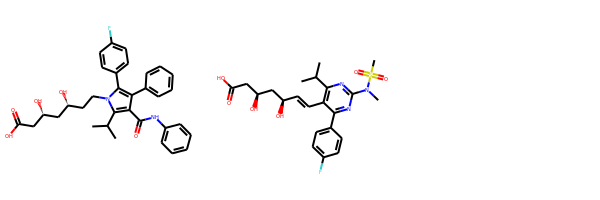

In [2]:
atorvastatin = Chem.MolFromSmiles('O=C(O)C[C@H](O)C[C@H](O)CCn2c(c(c(c2c1ccc(F)cc1)c3ccccc3)C(=O)Nc4ccccc4)C(C)C')
rosuvastatin = Chem.MolFromSmiles('OC(=O)C[C@H](O)C[C@H](O)\C=C\c1c(C(C)C)nc(N(C)S(=O)(=O)C)nc1c2ccc(F)cc2')
Draw.MolsToGridImage((atorvastatin,rosuvastatin))

In [3]:
def show_png(data):
    bio = io.BytesIO(data)
    img = Image.open(bio)
    return img

In [4]:
mh = Chem.AddHs(atorvastatin)

In [7]:
AllChem.EmbedMolecule(mh)

0

In [8]:
_, res = rdEHTTools.RunMol(mh)
static_chgs = res.GetAtomicCharges()[:atorvastatin.GetNumAtoms()]

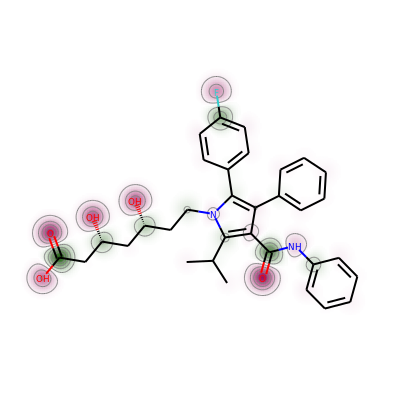

In [9]:
d = Draw.MolDraw2DCairo(400, 400)
SimilarityMaps.GetSimilarityMapFromWeights(atorvastatin, list(static_chgs), draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

In [10]:
pk = Psikit()

In [11]:
pk.mol = mh

In [12]:
pk.energy(basis_sets='scf/sto-3g')

-1829.2926588793907

In [23]:
pk.calc_mulliken_charges()

array([-0.25255482,  0.30143802, -0.32438822, -0.11717041,  0.08154207,
       -0.2881839 , -0.10450344,  0.08560203, -0.32517558, -0.10802402,
        0.00647477, -0.2435092 ,  0.09567415, -0.06943914, -0.02111642,
        0.0738876 , -0.01176704, -0.06475746, -0.09105971,  0.13365939,
       -0.13218515, -0.07742044, -0.04408668,  0.01098455, -0.06559951,
       -0.06040177, -0.06947448, -0.06135041, -0.04952727,  0.27081455,
       -0.27553738, -0.3447712 ,  0.11427093, -0.07903226, -0.05732334,
       -0.07598886, -0.05233332, -0.07936654, -0.03025464, -0.16285522,
       -0.1616809 ,  0.2134599 ,  0.09001733,  0.07105655,  0.05454394,
        0.15966017,  0.04380157,  0.07113013,  0.0591033 ,  0.18811014,
        0.06286486,  0.0599066 ,  0.09237473,  0.06247845,  0.06611371,
        0.0765223 ,  0.07491475,  0.07837828,  0.05471296,  0.05595264,
        0.06454757,  0.06120485,  0.06262242,  0.18890601,  0.04833459,
        0.0578249 ,  0.06043878,  0.06183679,  0.0908371 ,  0.04

In [24]:
pkmol = Chem.RemoveHs(pk.mol)
mulliken_charges = [np.float(atom.GetProp('MULLIKEN')) for atom in pkmol.GetAtoms()]

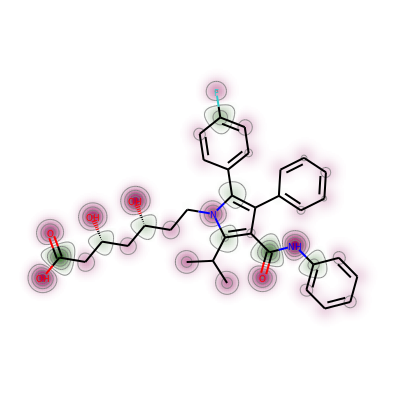

In [25]:
d = Draw.MolDraw2DCairo(400, 400)
SimilarityMaps.GetSimilarityMapFromWeights(atorvastatin, mulliken_charges, draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

In [26]:
pk.calc_resp_charges()

array([-0.58707072,  0.8153149 , -0.72173055, -0.09779333,  0.25603238,
       -0.63938072, -0.06584799,  0.28197432, -0.65881236, -0.21853324,
        0.01314628,  0.02276004, -0.14022884, -0.17539696, -0.03042297,
       -0.0346235 , -0.00406703, -0.17366068, -0.17558399,  0.26730977,
       -0.21123669, -0.19609819, -0.17156928,  0.12261896, -0.02683858,
       -0.25040249, -0.08499914, -0.21142084, -0.08225204,  0.49164292,
       -0.47808396, -0.43929781,  0.17429586, -0.22759428, -0.14535266,
       -0.09318717, -0.22005015, -0.08228356,  0.20042548, -0.14637423,
       -0.03704781,  0.46603762,  0.10844552, -0.01194338,  0.01010402,
        0.38378238, -0.01487967,  0.06317194,  0.02023941,  0.44283028,
        0.11077838,  0.08251306,  0.0602592 ,  0.04201902,  0.15528884,
        0.15048623,  0.16420791,  0.18088638,  0.07641597,  0.14064942,
        0.13458361,  0.14437931,  0.11236702,  0.29592724,  0.14712355,
        0.12874711,  0.12327978,  0.15026329,  0.14102895,  0.00

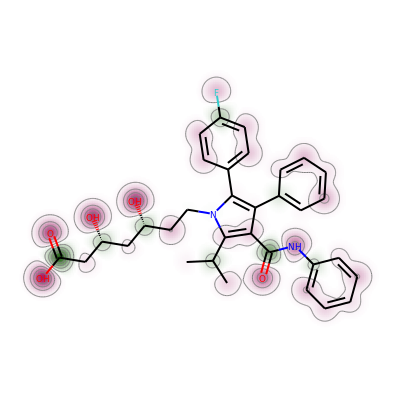

In [27]:
pkmol = Chem.RemoveHs(pk.mol)
mulliken_charges = [np.float(atom.GetProp('RESP')) for atom in pkmol.GetAtoms()]
d = Draw.MolDraw2DCairo(400, 400)
SimilarityMaps.GetSimilarityMapFromWeights(atorvastatin, mulliken_charges, draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())